In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/content/auto-mpg_without nan.csv')

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,1970,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,1970,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,1970,USA,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,1982,USA,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,1982,Germany,vw pickup
389,32.0,4,135.0,84,2295,11.6,1982,USA,dodge rampage
390,28.0,4,120.0,79,2625,18.6,1982,USA,ford ranger


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [ ]:
#convert  df["origin"] object to categorical
df["origin"]=df["origin"].astype('category')
df["origin"]=df["origin"].cat.codes
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,1970,2,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970,2,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970,2,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,1970,2,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,1970,2,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,1982,2,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,1982,0,vw pickup
389,32.0,4,135.0,84,2295,11.6,1982,2,dodge rampage
390,28.0,4,120.0,79,2625,18.6,1982,2,ford ranger


In [ ]:
df.drop(df.columns[8:],axis=1,inplace=True)
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,1970,2
1,15.0,8,350.0,165,3693,11.5,1970,2
2,18.0,8,318.0,150,3436,11.0,1970,2
3,16.0,8,304.0,150,3433,12.0,1970,2
4,17.0,8,302.0,140,3449,10.5,1970,2
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,1982,2
388,44.0,4,97.0,52,2130,24.6,1982,0
389,32.0,4,135.0,84,2295,11.6,1982,2
390,28.0,4,120.0,79,2625,18.6,1982,2


In [ ]:
# x=df.iloc[:,1::]
x=df.iloc[:,1:8]
y=df.iloc[:,0]

In [ ]:
x.shape

(392, 7)

In [ ]:
x

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,1970,2
1,8,350.0,165,3693,11.5,1970,2
2,8,318.0,150,3436,11.0,1970,2
3,8,304.0,150,3433,12.0,1970,2
4,8,302.0,140,3449,10.5,1970,2
...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,1982,2
388,4,97.0,52,2130,24.6,1982,0
389,4,135.0,84,2295,11.6,1982,2
390,4,120.0,79,2625,18.6,1982,2


In [ ]:
df_cor=df.corr().abs().round(2)
df_cor

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,0.78,0.81,0.78,0.83,0.42,0.58,0.47
cylinders,0.78,1.00,0.95,0.84,0.90,0.50,0.35,0.56
displacement,0.81,0.95,1.00,0.90,0.93,0.54,0.37,0.59
horsepower,0.78,0.84,0.90,1.00,0.86,0.69,0.42,0.45
weight,0.83,0.90,0.93,0.86,1.00,0.42,0.31,0.52
acceleration,0.42,0.50,0.54,0.69,0.42,1.00,0.29,0.26
year,0.58,0.35,0.37,0.42,0.31,0.29,1.00,0.07
origin,0.47,0.56,0.59,0.45,0.52,0.26,0.07,1.00


In [ ]:
#correlation between the target and the  features
features_select=df_cor[df_cor['mpg']>=0.7]
features_select

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,0.78,0.81,0.78,0.83,0.42,0.58,0.47
cylinders,0.78,1.00,0.95,0.84,0.90,0.50,0.35,0.56
displacement,0.81,0.95,1.00,0.90,0.93,0.54,0.37,0.59
horsepower,0.78,0.84,0.90,1.00,0.86,0.69,0.42,0.45
weight,0.83,0.90,0.93,0.86,1.00,0.42,0.31,0.52


In [ ]:
features_select=list(df_cor[df_cor['mpg']>=0.5].index)
features_select

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'year']

In [ ]:
features_select.remove('mpg')
# features_select.pop(0)
features_select

['cylinders', 'displacement', 'horsepower', 'weight', 'year']

In [ ]:
features_select_1=x[features_select]
features_select_1

,cylinders,displacement,horsepower,weight,year
0,8,307.0,130,3504,1970
1,8,350.0,165,3693,1970
2,8,318.0,150,3436,1970
3,8,304.0,150,3433,1970
4,8,302.0,140,3449,1970
...,...,...,...,...,...
387,4,140.0,86,2790,1982
388,4,97.0,52,2130,1982
389,4,135.0,84,2295,1982
390,4,120.0,79,2625,1982


In [ ]:
#correlation between the features
x_corr=x.corr().abs().round(2)
x_corr

,cylinders,displacement,horsepower,weight,acceleration,year,origin
cylinders,1.00,0.95,0.84,0.90,0.50,0.35,0.56
displacement,0.95,1.00,0.90,0.93,0.54,0.37,0.59
horsepower,0.84,0.90,1.00,0.86,0.69,0.42,0.45
weight,0.90,0.93,0.86,1.00,0.42,0.31,0.52
acceleration,0.50,0.54,0.69,0.42,1.00,0.29,0.26
year,0.35,0.37,0.42,0.31,0.29,1.00,0.07
origin,0.56,0.59,0.45,0.52,0.26,0.07,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

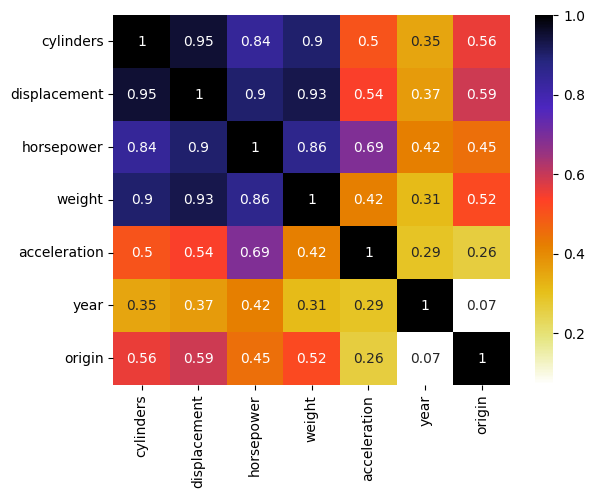

In [ ]:
# Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix.
import seaborn as sns
sns.heatmap(x_corr,annot=True,cmap=plt.cm.CMRmap_r) #Setting annot to true gives us the numbers in each cell.
plt.show

In [ ]:
# cor_features=[]
cor_features=set()
corr_matrix=x.corr()
for i in range (len(corr_matrix.columns)):
    for j in range (i):
       if corr_matrix.iloc[i,j]>0.8:
        cor_features.add(corr_matrix.columns[i])
features_drop=cor_features
features_drop

{'displacement', 'horsepower', 'weight'}

In [ ]:
# def correlation(dataset,thresh):
#   cor_features=set()
#   corr_matrix=dataset.corr()
#   for i in range (len(corr_matrix.columns)):
#     for j in range (i):
#       if corr_matrix.iloc[i,j]>thresh:
#         cor_features.add(corr_matrix.columns[i])
#   return cor_features
# features_drop=correlation(x,0.8)


In [ ]:
features_select_2=x.drop(features_drop,axis=1)
features_select_2


,cylinders,acceleration,year,origin
0,8,12.0,1970,2
1,8,11.5,1970,2
2,8,11.0,1970,2
3,8,12.0,1970,2
4,8,10.5,1970,2
...,...,...,...,...
387,4,15.6,1982,2
388,4,24.6,1982,0
389,4,11.6,1982,2
390,4,18.6,1982,2


In [ ]:
scale = MinMaxScaler()
# x_scaled=scale.fit_transform(x)
# x_scaled=scale.fit_transform(features_select_1)
x_scaled=scale.fit_transform(features_select_2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(313, 4)

In [ ]:
y_train.shape

(313,)

In [ ]:
X_test.shape

(79, 4)

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred.shape

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mae=mae.astype(int)
mae

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.7089461641644808
